In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [3]:
#Read path with Pandas
Polarbear_data = pd.read_csv('CS_SB_PBearMeasurementData_1981_2017.csv')
Polarbear_data

/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/3683662758.py:2: DtypeWarning: Columns (5,6,7,8,9,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  Polarbear_data = pd.read_csv('CS_SB_PBearMeasurementData_1981_2017.csv')


,Collecting_Agency,Population,Date,BearID,Sex,Age,Total_Length,Standard_Length,Heart_Girth,Skull_Width,...,Unnamed: 16131,Unnamed: 16132,Unnamed: 16133,Unnamed: 16134,Unnamed: 16135,Unnamed: 16136,Unnamed: 16137,Unnamed: 16138,Unnamed: 16139,Unnamed: 16140
0,USGS,SB,4/9/82,1.0,M,17,218.0,no data,140.0,no data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,SB,5/4/86,1.0,M,21,240.0,219.4,149.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,SB,4/21/87,1.0,M,22,238.0,216.4,129.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,SB,4/6/87,2.0,F,18,212.0,196.5,127.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,SB,10/19/81,2.0,F,12,198.0,no data,175.0,no data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,USGS,SB,4/22/16,2293.0,F,10.0,no data,201.0,124.0,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3170,USGS,SB,4/25/10,2294.0,F,9.0,222.0,202.0,115.0,20.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get info on the Dataset
Polarbear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Columns: 16141 entries, Collecting_Agency to Unnamed: 16140
dtypes: float64(16120), object(21)
memory usage: 390.9+ MB


In [5]:
cleaned_polarbear = Polarbear_data[['Date','BearID', 'Sex', 'Age', 'Mass', 'Total_Length','Number_of_cubs']]
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs
0,4/9/82,1.0,M,17,267.6,218.0,NaN
1,5/4/86,1.0,M,21,no data,240.0,NaN
2,4/21/87,1.0,M,22,no data,238.0,NaN
3,4/6/87,2.0,F,18,no data,212.0,0.0
4,10/19/81,2.0,F,12,no data,198.0,2.0
...,...,...,...,...,...,...,...
3169,4/22/16,2293.0,F,10.0,202.3,no data,0.0
3170,4/25/10,2294.0,F,9.0,175.5,222.0,0.0
3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
cleaned_polarbear['year'] = cleaned_polarbear['Date'].dt.year
cleaned_polarbear

/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/803163165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/803163165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/803163165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1.0,M,17,267.6,218.0,NaN,1982.0
1,1986-05-04,1.0,M,21,no data,240.0,NaN,1986.0
2,1987-04-21,1.0,M,22,no data,238.0,NaN,1987.0
3,1987-04-06,2.0,F,18,no data,212.0,0.0,1987.0
4,1981-10-19,2.0,F,12,no data,198.0,2.0,1981.0
...,...,...,...,...,...,...,...,...
3169,2016-04-22,2293.0,F,10.0,202.3,no data,0.0,2016.0
3170,2010-04-25,2294.0,F,9.0,175.5,222.0,0.0,2010.0
3171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Convert 'Age', 'Mass', 'Total_Length', 'Number_of_cubs', and 'year' to float, turning 'no data' into NaN
cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
cleaned_polarbear['Total_Length'] = pd.to_numeric(cleaned_polarbear['Total_Length'], errors='coerce')
cleaned_polarbear['Number_of_cubs'] = pd.to_numeric(cleaned_polarbear['Number_of_cubs'], errors='coerce')
cleaned_polarbear['year'] = pd.to_numeric(cleaned_polarbear['year'], errors='coerce')
cleaned_polarbear['BearID'] = pd.to_numeric(cleaned_polarbear['BearID'], errors='coerce')
cleaned_polarbear

/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/3822074629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/3822074629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/3822074629.py:4: Sett

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1.0,M,17.0,267.6,218.0,NaN,1982.0
1,1986-05-04,1.0,M,21.0,NaN,240.0,NaN,1986.0
2,1987-04-21,1.0,M,22.0,NaN,238.0,NaN,1987.0
3,1987-04-06,2.0,F,18.0,NaN,212.0,0.0,1987.0
4,1981-10-19,2.0,F,12.0,NaN,198.0,2.0,1981.0
...,...,...,...,...,...,...,...,...
3169,2016-04-22,2293.0,F,10.0,202.3,NaN,0.0,2016.0
3170,2010-04-25,2294.0,F,9.0,175.5,222.0,0.0,2010.0
3171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Handling Missing Values
# Option 1: Drop rows with any missing values in 'Date', 'Sex', 'Number_of_cubs' or'Mass'
df_cleaned = cleaned_polarbear.dropna(subset=['Mass', 'Total_Length', 'year', 'Number_of_cubs'])
df_cleaned

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
5,1986-04-29,2.0,F,17.0,213.2,212.0,2.0,1986.0
7,1985-05-11,4.0,F,16.0,204.1,218.0,2.0,1985.0
11,1984-03-28,7.0,F,13.0,215.5,226.0,1.0,1984.0
12,1991-04-08,8.0,F,22.0,206.4,218.5,0.0,1991.0
13,1992-04-14,8.0,F,23.0,158.8,231.0,2.0,1992.0
...,...,...,...,...,...,...,...,...
3145,2010-04-14,2275.0,F,10.0,160.6,221.0,2.0,2010.0
3152,2010-04-12,2280.0,F,8.0,169.6,220.0,2.0,2010.0
3153,2011-04-02,2280.0,F,9.0,161.0,216.3,2.0,2011.0
3166,2009-05-08,2290.0,F,10.0,195.5,226.0,0.0,2009.0


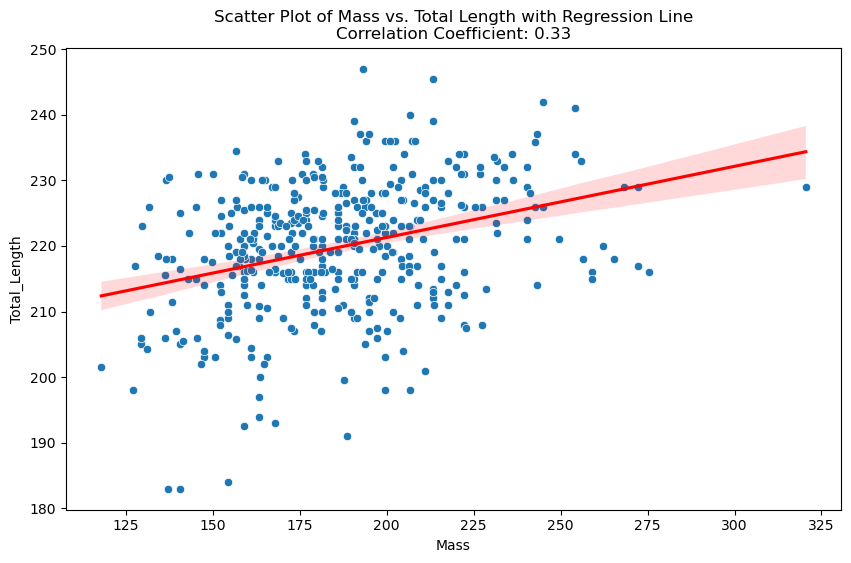

In [9]:
#Sample Graph
import seaborn as sns
import matplotlib.pyplot as plt


correlation_coefficient = df_cleaned['Mass'].corr(df_cleaned['Total_Length'])

# Now, create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mass', y='Total_Length', data=df_cleaned)
sns.regplot(x='Mass', y='Total_Length', data=df_cleaned, scatter=False, color='red')

# Add correlation coefficient to the plot
plt.title(f'Scatter Plot of Mass vs. Total Length with Regression Line\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Show the plot
plt.show()



/Users/paoloarciaga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


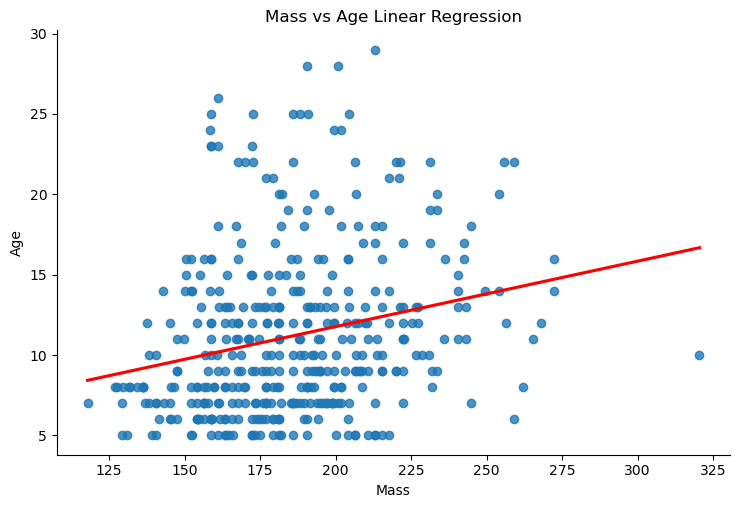

In [10]:
#Sample Graph # 2
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear regression line
sns.lmplot(x='Mass', y='Age', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Mass vs Age Linear Regression')
plt.xlabel('Mass')
plt.ylabel('Age')

# Show the plot
plt.show()


/Users/paoloarciaga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


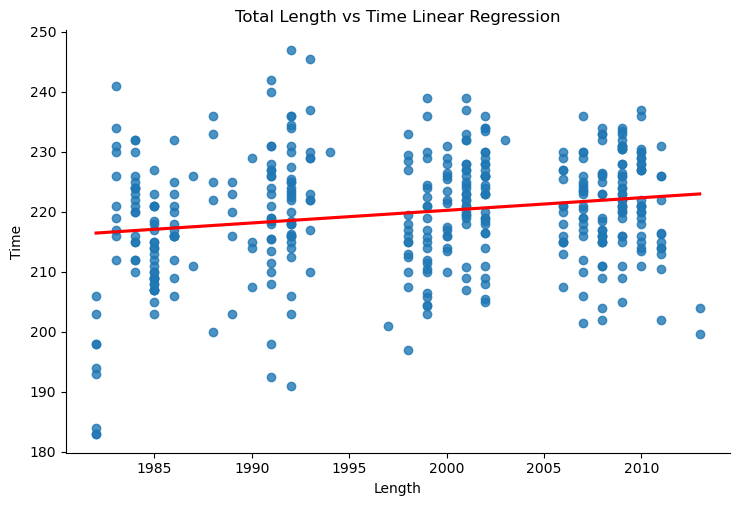

In [11]:
#Sample Graph # 3
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a linear regression line
sns.lmplot(x='year', y='Total_Length', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Total Length vs Time Linear Regression')
plt.xlabel('Length')
plt.ylabel('Time')

# Show the plot
plt.show()

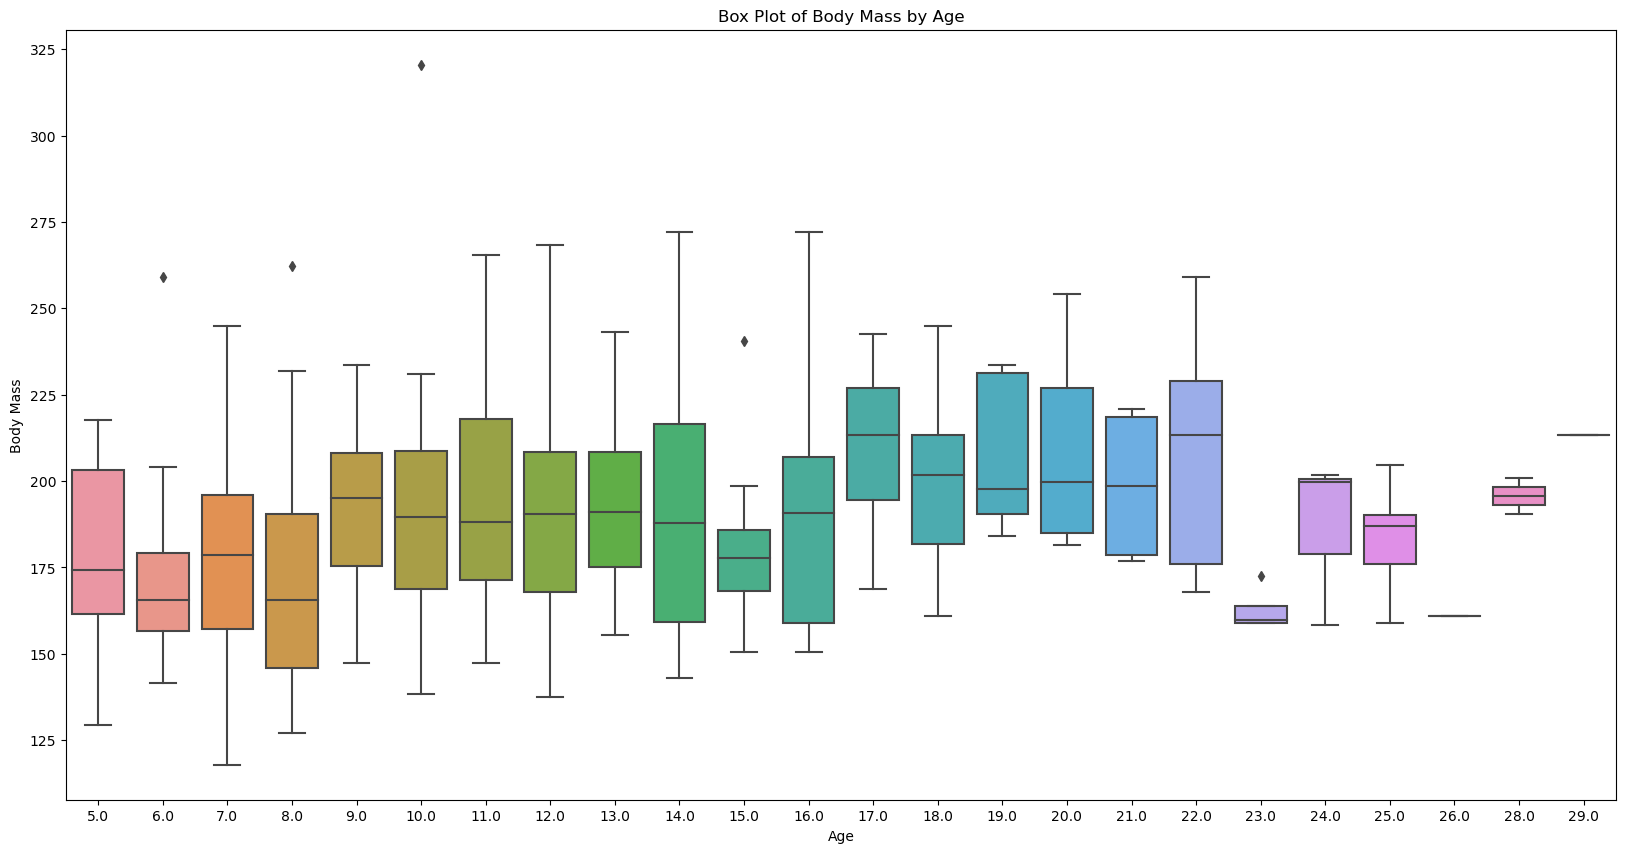

In [12]:
#Example of Boxplot
import seaborn as sns
import matplotlib.pyplot as plt



# Create a box plot of mass by sex and age
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age', y='Mass',  data=df_cleaned)

# Add title and labels
plt.title('Box Plot of Body Mass by Age')
plt.xlabel('Age')
plt.ylabel('Body Mass')

# Show the plot
plt.show()


Distribution of Male vs. Female
Distribution of Female vs Female with Cubs

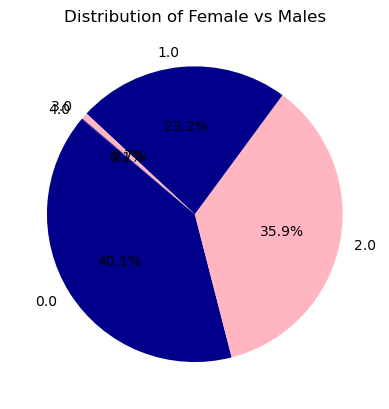

In [13]:
# Counting the number of female and male Bears
sex_distribution = cleaned_polarbear['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Males')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

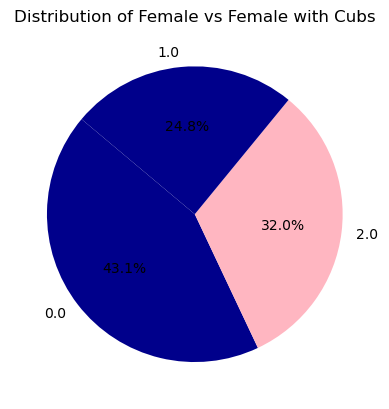

In [14]:
# Counting the number of female and females with cubs
sex_distribution = df_cleaned['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Female with Cubs')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

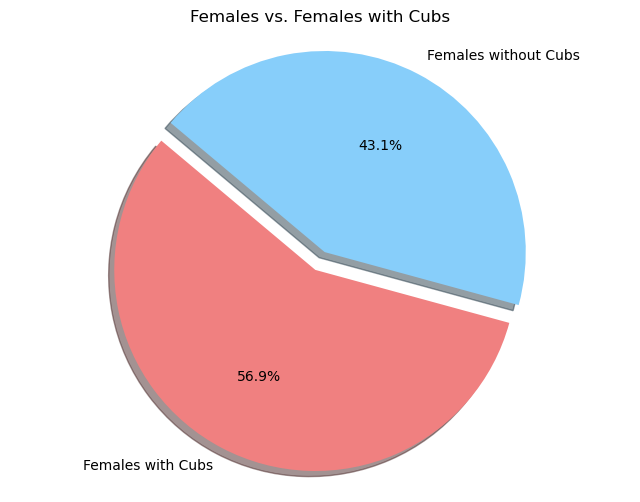

In [15]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Sex' and 'Number_of_cubs' columns
# Filter the DataFrame for only females
females = df_cleaned[df_cleaned['Sex'] == 'F']

# Determine the count of females without cubs and with cubs
females_with_cubs = females[females['Number_of_cubs'] > 0].shape[0]
females_without_cubs = females[females['Number_of_cubs'] == 0].shape[0]

# Data to plot
labels = 'Females with Cubs', 'Females without Cubs'
sizes = [females_with_cubs, females_without_cubs]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Females vs. Females with Cubs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


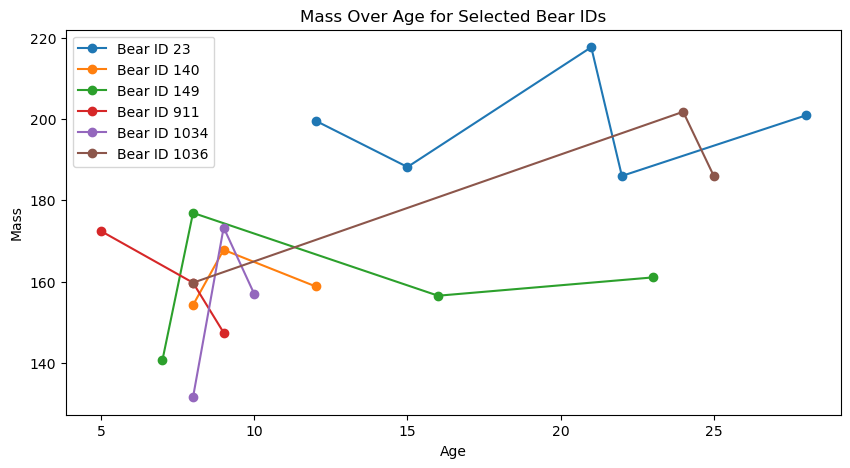

In [16]:
#Line plot age vs Mass
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
selected_bear_ids = [23, 140, 149, 911, 1034, 1036,]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('Age')

# Plotting 'Year' vs 'Mass' for each Bear ID
plt.figure(figsize=(10,5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['Age'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Adding title and labels
plt.title('Mass Over Age for Selected Bear IDs')
plt.xlabel('Age')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


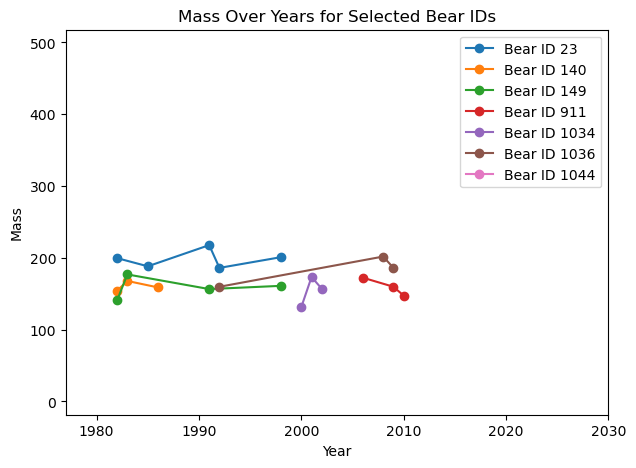

In [17]:
import matplotlib.pyplot as plt


selected_bear_ids = [23, 140, 149, 911, 1034, 1036, 1044]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('year')

# Increase the figure size for better visibility
plt.figure(figsize=(7, 5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['year'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Expand the x and y limits if needed to include more data
plt.xlim(min(selected_bears_sorted['year']) - 5, max(selected_bears_sorted['year']) + 20)
plt.ylim(min(selected_bears_sorted['Mass']) - 150, max(selected_bears_sorted['Mass']) + 300)

# Adding title and labels
plt.title('Mass Over Years for Selected Bear IDs')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


# Summary Statistics
---

In [18]:
# Generate a summary statistics table for body mass
mass_summary = df_cleaned['Mass'].describe()

# Additional statistics: variance, standard deviation, and SEM
mass_summary['variance'] = df_cleaned['Mass'].var()
mass_summary['std_dev'] = df_cleaned['Mass'].std()
mass_summary['sem'] = st.sem(df_cleaned['Mass'], nan_policy='omit')

# Print the summary statistics table
print(mass_summary)

count       415.000000
mean        186.234458
std          30.203155
min         117.900000
25%         163.300000
50%         182.300000
75%         204.100000
max         320.500000
variance    912.230573
std_dev      30.203155
sem           1.482615
Name: Mass, dtype: float64


In [35]:
# Group by 'year' and calculate mean, median, variance, std, and SEM for body mass
mass_summary_by_year = df_cleaned.groupby('year')['Mass'].agg(['mean', 'median', 'var', 'std'])

# Calculate SEM separately since it requires a different function
mass_summary_by_year['sem'] = df_cleaned.groupby('year')['Mass'].apply(lambda x: st.sem(x, nan_policy='omit'))

# Rename the columns 
mass_summary_by_year.columns = ['Mean', 'Median', 'Variance', 'StandardDeviation', 'SEM']

# Put it into a DataFrame
mass_summary_df = mass_summary_by_year.copy()

# Display the resulting DataFrame
print(mass_summary_df)

              Mean  Median     Variance  StandardDeviation        SEM
year                                                                 
1982.0  160.866667  161.00   631.677500          25.133195   8.377732
1983.0  196.630000  192.75  1325.033444          36.401009  11.511010
1984.0  191.100000  190.50   572.601111          23.929085   5.489709
1985.0  185.796552  181.40   684.956059          26.171665   4.859956
1986.0  194.964286  185.95  1553.820934          39.418535  10.535047
1987.0  220.450000  220.45    93.845000           9.687363   6.850000
1988.0  202.260000  202.30   914.608000          30.242487  13.524851
1989.0  184.180000  186.00   139.642000          11.817022   5.284733
1990.0  252.850000  240.90  2479.556667          49.795147  24.897574
1991.0  185.696000  186.00   868.022067          29.462214   5.892443
1992.0  171.867742  172.70   525.220258          22.917684   4.116138
1993.0  184.950000  177.25  2168.462778          46.566756  14.725701
1994.0  181.800000  

/Users/paoloarciaga/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/paoloarciaga/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [21]:
# Define the year bins
year_bins = [1981, 1990, 2000, 2010, 2018]  # Adjust the bin edges as needed

# Create a new column 'YearBin' to represent the bins
df_cleaned['YearBin'] = pd.cut(df_cleaned['year'], bins=year_bins, labels=['1981-1989', '1990-1999', '2000-2009', '2010-2017'])

# Group by 'YearBin' and calculate mean, median, variance, std, and SEM for body mass
mass_summary_by_year_bin = df_cleaned.groupby('YearBin')['Mass'].agg(['mean', 'median', 'var', 'std'])

# Calculate SEM separately since it requires a different function
mass_summary_by_year_bin['sem'] = df_cleaned.groupby('YearBin')['Mass'].apply(lambda x: st.sem(x, nan_policy='omit'))

# Reset index to make the resulting DataFrame more readable
mass_summary_by_year_bin = mass_summary_by_year_bin.reset_index()

# Rename the columns for clarity
mass_summary_by_year_bin.columns = ['YearBin', 'Mean', 'Median', 'Variance', 'StandardDeviation', 'SEM']

# Display the resulting DataFrame
print(mass_summary_by_year_bin)

     YearBin        Mean  Median     Variance  StandardDeviation       SEM
0  1981-1989  191.207216  186.00  1102.152760          33.198686  3.370816
1  1990-1999  179.678689  178.05   828.920699          28.790983  2.606613
2  2000-2009  188.132967  188.20   822.368962          28.676976  2.125679
3  2010-2017  184.228571  181.00  1104.177582          33.229168  8.880869


/var/folders/pb/ks3fck357d19szchn30pmn2m0000gn/T/ipykernel_32378/3180740652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearBin'] = pd.cut(df_cleaned['year'], bins=year_bins, labels=['1981-1989', '1990-1999', '2000-2009', '2010-2017'])


In [22]:
# Count the number of unique Bear IDs
unique_bear_ids_count = df_cleaned['BearID'].nunique()

# Display the result
print(f"Number of Unique Bear IDs: {unique_bear_ids_count}")

Number of Unique Bear IDs: 297


In [23]:
# Group by 'BearID' and calculate the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Convert the result to a DataFrame for better representation
years_analyzed_df = pd.DataFrame({'BearID': years_analyzed_per_bear.index, 'Years_Analyzed': years_analyzed_per_bear.values})

# Display the resulting DataFrame
print(years_analyzed_df)

     BearID  Years_Analyzed
0       2.0               1
1       4.0               1
2       7.0               1
3       8.0               2
4       9.0               1
..      ...             ...
292  2271.0               2
293  2275.0               1
294  2280.0               2
295  2290.0               1
296  2294.0               1

[297 rows x 2 columns]


In [24]:
# Group by 'BearID' and count the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Filter Bear IDs that were analyzed for at least 3 years
bear_ids_analyzed_at_least_3_years = years_analyzed_per_bear[years_analyzed_per_bear >= 3]

# Count the number of unique Bear IDs that meet the condition
unique_bear_ids_analyzed_at_least_3_years = bear_ids_analyzed_at_least_3_years.count()

# Display the result
print(f"Number of Unique Bear IDs Analyzed at Least 3 Years: {unique_bear_ids_analyzed_at_least_3_years}")

Number of Unique Bear IDs Analyzed at Least 3 Years: 24


In [25]:
# Group by 'BearID' and count the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Filter Bear IDs that were analyzed for at least 3 years
bear_ids_analyzed_at_least_3_years = years_analyzed_per_bear[years_analyzed_per_bear >= 3]

# Print out each Bear ID that was analyzed at least 3 years
print("Bear IDs Analyzed at Least 3 Years:")
print(bear_ids_analyzed_at_least_3_years.index)

Bear IDs Analyzed at Least 3 Years:
Index([  23.0,   44.0,   96.0,  134.0,  140.0,  149.0,  281.0,  382.0,  385.0,
        517.0,  911.0,  969.0, 1034.0, 1036.0, 1056.0, 1099.0, 1100.0, 1116.0,
       1122.0, 1125.0, 1137.0, 1151.0, 1156.0, 1162.0],
      dtype='float64', name='BearID')


In [32]:
# List of 24 selected Bear IDs
selected_bear_ids = [23, 44.0,   96.0,  134.0,  140.0,  149.0,  281.0,  382.0,  385.0,
        517.0,  911.0,  969.0, 1034.0, 1036.0, 1056.0, 1099.0, 1100.0, 1116.0,
       1122.0, 1125.0, 1137.0, 1151.0, 1156.0, 1162.0]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Calculate the average body mass for each Bear ID
average_mass_per_bear = selected_bears.groupby('BearID')['Mass'].mean().reset_index()

# Print results
print(average_mass_per_bear)

    BearID        Mass
0     23.0  198.480000
1     44.0  223.766667
2     96.0  188.800000
3    134.0  165.866667
4    140.0  160.266667
5    149.0  158.750000
6    281.0  193.550000
7    382.0  211.000000
8    385.0  192.300000
9    517.0  203.833333
10   911.0  159.833333
11   969.0  200.966667
12  1034.0  153.900000
13  1036.0  182.500000
14  1056.0  189.928571
15  1099.0  211.925000
16  1100.0  181.900000
17  1116.0  170.450000
18  1122.0  183.400000
19  1125.0  213.333333
20  1137.0  158.733333
21  1151.0  174.075000
22  1156.0  194.566667
23  1162.0  173.100000


In [34]:
# Filter the DataFrame to include only the selected Bear IDs
selected_bears_mass_summary = mass_summary_by_year_bear[mass_summary_by_year_bear['BearID'].isin(selected_bear_ids)]

# Identify Bear IDs with increasing body mass year over year
bears_with_increasing_mass = selected_bears_mass_summary.groupby('BearID').apply(lambda x: all(x['Mean'].diff().fillna(0) > 0)).reset_index(name='IncreasingMass')

# Display the resulting DataFrame
print(bears_with_increasing_mass)

    BearID  IncreasingMass
0     23.0           False
1     44.0           False
2     96.0           False
3    134.0           False
4    140.0           False
5    149.0           False
6    281.0           False
7    382.0           False
8    385.0           False
9    517.0           False
10   911.0           False
11   969.0           False
12  1034.0           False
13  1036.0           False
14  1056.0           False
15  1099.0           False
16  1100.0           False
17  1116.0           False
18  1122.0           False
19  1125.0           False
20  1137.0           False
21  1151.0           False
22  1156.0           False
23  1162.0           False
